## System setup

---


##### Importing modules


In [1]:
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import (
    TensorBoard,
    ModelCheckpoint,
    EarlyStopping,
    ReduceLROnPlateau
)

from toolkit.classes import DataSet, ImageProcessor, Augmenter, Model

2023-01-30 00:13:26.026588: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-30 00:13:26.513486: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-30 00:13:26.513522: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-30 00:13:28.395924: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Read dataset

---


##### Create image dataframe


In [2]:
images = DataSet()

In [3]:
datasets = ["raw", "data", "augmented", "preprocessed"]
for dataset in datasets:
    images.update_dataset(dataset=dataset)


Found 150 images in ./raw/Train/Non defective/
Found 150 images in ./raw/Train/Defective/
Found 31 images in ./raw/Validation/Non defective/
Found 31 images in ./raw/Validation/Defective/
Found 11 images in ./raw/Test/Non defective/
Found 11 images in ./raw/Test/Defective/
Found 150 images in ./data/Train/Non defective/
Found 150 images in ./data/Train/Defective/
Found 31 images in ./data/Validation/Non defective/
Found 31 images in ./data/Validation/Defective/
Found 11 images in ./data/Test/Non defective/
Found 11 images in ./data/Test/Defective/
Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/
Found 150 images in ./preprocessed/Train/Non defective/
Found 150 images in ./preprocessed/Train/Defective/
Found 31 images in ./preprocessed/Validation/Non defective/
Found 31 images in ./preprocessed/Validation/Defective/
Found 11 images in ./preprocessed/Test/Non defective/
Found 11 images in ./preprocessed/Test/Defective/


## Data augmentation

---


In [4]:
N_augmented = 25

In [8]:
image_augmenter = Augmenter(N_augmented, images.data)
image_augmenter.remove_old_data(images.augmented_folder)
image_augmenter.augment_images()
del image_augmenter
images.update_dataset("augmented")
images.augmented


100%|██████████| 25/25 [00:08<00:00,  3.08it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


,type,defect,defect_str,path,filename,img,height,width,components,R_mean,G_mean,B_mean
0,train,0,Non defective,./augmented/Train/Non defective/,75_augmented.jpg,./augmented/Train/Non defective/75_augmented.jpg,0,0,0,0.0,0.0,0.0
1,train,0,Non defective,./augmented/Train/Non defective/,29_augmented.jpg,./augmented/Train/Non defective/29_augmented.jpg,0,0,0,0.0,0.0,0.0
2,train,0,Non defective,./augmented/Train/Non defective/,14_augmented.jpg,./augmented/Train/Non defective/14_augmented.jpg,0,0,0,0.0,0.0,0.0
3,train,0,Non defective,./augmented/Train/Non defective/,56_augmented.jpg,./augmented/Train/Non defective/56_augmented.jpg,0,0,0,0.0,0.0,0.0
4,train,0,Non defective,./augmented/Train/Non defective/,112_augmented.jpg,./augmented/Train/Non defective/112_augmented.jpg,0,0,0,0.0,0.0,0.0
5,train,0,Non defective,./augmented/Train/Non defective/,39_augmented.jpg,./augmented/Train/Non defective/39_augmented.jpg,0,0,0,0.0,0.0,0.0
6,train,0,Non defective,./augmented/Train/Non defective/,7_augmented.jpg,./augmented/Train/Non defective/7_augmented.jpg,0,0,0,0.0,0.0,0.0
7,train,0,Non defective,./augmented/Train/Non defective/,33_augmented.jpg,./augmented/Train/Non defective/33_augmented.jpg,0,0,0,0.0,0.0,0.0
8,train,0,Non defective,./augmented/Train/Non defective/,63_augmented.jpg,./augmented/Train/Non defective/63_augmented.jpg,0,0,0,0.0,0.0,0.0
9,train,0,Non defective,./augmented/Train/Non defective/,140_augmented.jpg,./augmented/Train/Non defective/140_augmented.jpg,0,0,0,0.0,0.0,0.0


## Image processing

---


In [5]:
img_height = 227
img_width = 227

preprocessing_steps = [
    "original",
    "resize",
    "save",
]

preprocessing_kwargs = {
    "crop": {"ratio": 0.1},
    "resize": {"height": img_height, "width": img_width},
    "hist_eq": {
        "type": "CLAHE",
        "size": (16, 16),
    },
    "noise_filt": {"type": "median", "size": 11},
    "Laplacian": {"size": 5},
    "Canny": {"low": 100, "high": 200},
    "Hough": {"minLineLength": 10, "maxLineGap": 20},
    "feat_detect": {"type": "ORB"},
}


In [5]:
image_processor = ImageProcessor(steps=preprocessing_steps, kwargs=preprocessing_kwargs)
image_processor.remove_old_data(images.preprocessed_folder)
image_processor.process_images(images.data)
image_processor.process_images(images.augmented)
del image_processor


384it [02:25,  2.63it/s]
50it [00:21,  2.29it/s]


## Model build

---


##### Construct neural network


In [6]:
CNN = Model('AlexNet')

CNN.epochs = 1000
CNN.batch_size = 32

CNN.optimizer = Adam(
    learning_rate=0.0001
)

CNN.callbacks = [
    TensorBoard(log_dir="./logs", write_images=True),
    ModelCheckpoint(
        f"./models/{CNN.name}.h5",
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode="auto",
        save_freq="epoch",
    ),
    EarlyStopping(
        monitor="val_accuracy",
        patience=200,
        verbose=1,
        mode="auto",
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.1,
        patience=2,
        verbose=1,
        mode="auto",
        min_lr=0.000005
    )
]

CNN.load_datasets(color_mode='rgb')
CNN.build_model()
CNN.compile_model()
CNN.model.summary()


2023-01-30 00:13:51.226993: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-30 00:13:51.227031: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tomcom): /proc/driver/nvidia/version does not exist
2023-01-30 00:13:51.228164: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 300 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.


2023-01-30 00:13:51.557170: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 150994944 exceeds 10% of free system memory.
2023-01-30 00:13:51.624615: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 150994944 exceeds 10% of free system memory.
2023-01-30 00:13:51.656030: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 150994944 exceeds 10% of free system memory.
2023-01-30 00:13:51.745022: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 67108864 exceeds 10% of free system memory.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 227, 227, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       8

2023-01-30 00:13:51.776524: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 67108864 exceeds 10% of free system memory.


##### Train


In [9]:
CNN.train_net()


Epoch 1/1000
11/11 [==============================] - ETA: 0s - loss: 0.6949 - accuracy: 0.5229
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/AlexNet.h5
11/11 [==============================] - 66s 6s/step - loss: 0.6949 - accuracy: 0.5229 - val_loss: 0.7126 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/1000
11/11 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.5114
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 54s 5s/step - loss: 0.6935 - accuracy: 0.5114 - val_loss: 0.6913 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 3/1000
11/11 [==============================] - ETA: 0s - loss: 0.6923 - accuracy: 0.5514
Epoch 3: val_accuracy did not improve from 0.50000

Epoch 3: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
11/11 [==============================] - 51s 4s/step - loss: 0.6923 - accuracy: 0.5514 - val_loss: 0.6903 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 

##### Predict


In [10]:
CNN.predict_test()


1/1 [==============================] - 2s 2s/step
Test values:          [1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0]
Predicted values:     [0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1]


##### Metrics


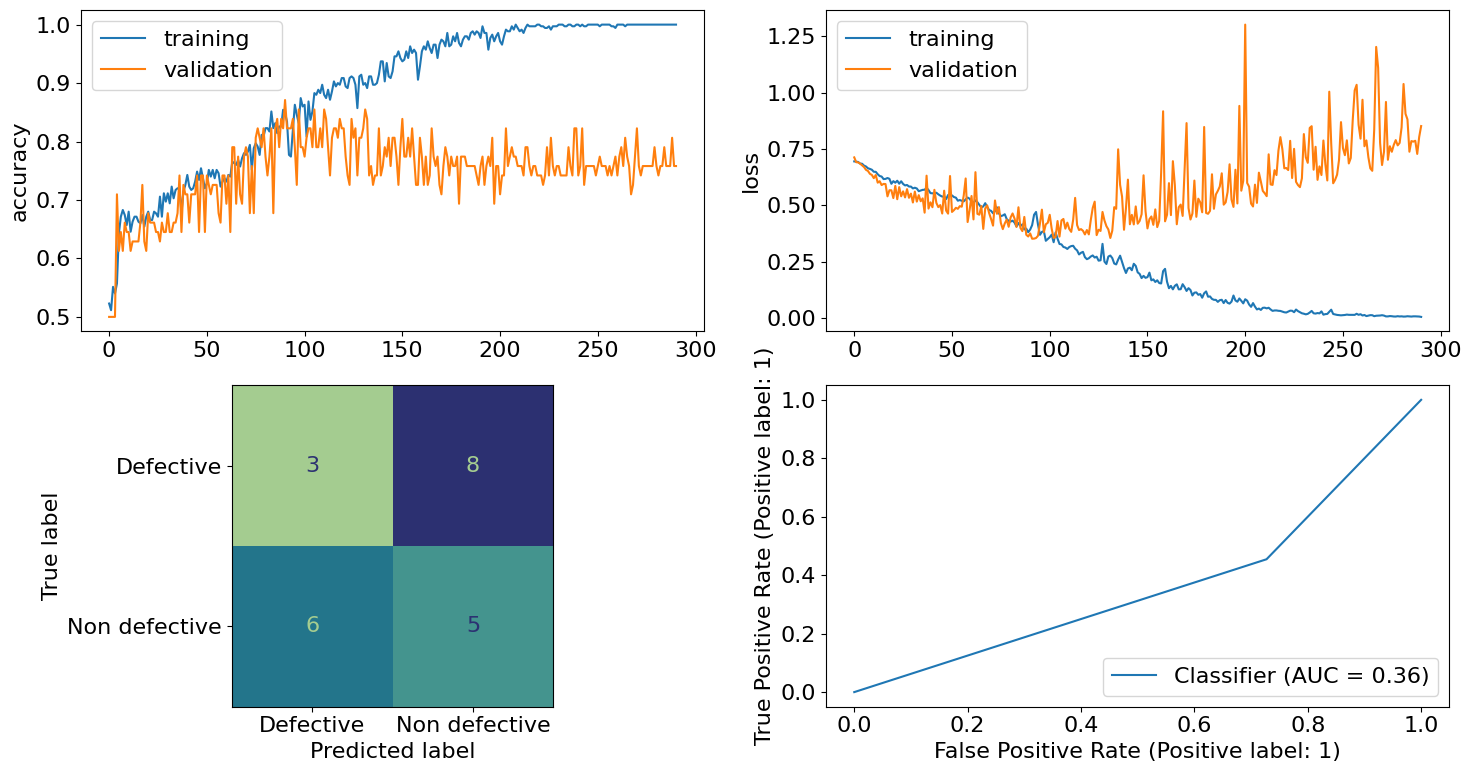

In [11]:
CNN.show_metrics(save_folder=images.plot_folder)


#### Run with tuned learning rate

Found 350 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.
Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.5429
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/AlexNet_LR.h5
11/11 [==============================] - 39s 3s/step - loss: 0.6937 - accuracy: 0.5429 - val_loss: 0.7079 - val_accuracy: 0.5000
Epoch 2/100
11/11 [==============================] - ETA: 0s - loss: 0.6947 - accuracy: 0.5229
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 28s 2s/step - loss: 0.6947 - accuracy: 0.5229 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/100
11/11 [==============================] - ETA: 0s - loss: 0.6972 - accuracy: 0.5057
Epoch 3: val_accuracy did not improve from 0.50000
11/11 [==============================] - 30s 3s/step - loss: 0.6972 - accuracy: 0.5057 - val_loss: 0.7047 - val_accuracy: 0.5000
Epoch 4/100
11/1

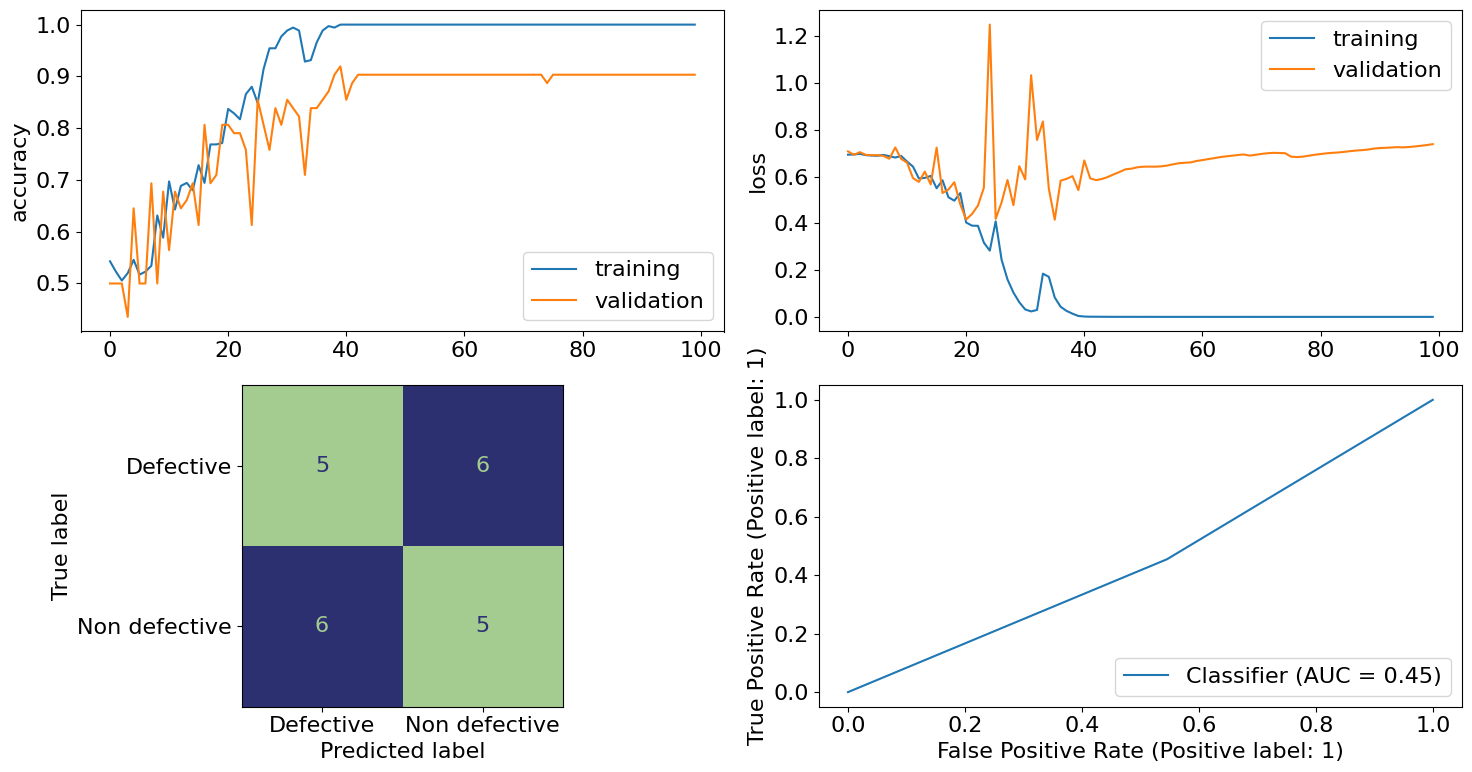

In [8]:
CNN = Model("AlexNet")

CNN.epochs = 100
CNN.batch_size = 32

CNN.optimizer = Adam(
    learning_rate=8.314541851625895e-05
)

CNN.callbacks = [
    TensorBoard(log_dir="./logs"),
    ModelCheckpoint(
        f"./models/{CNN.name}_LR.h5",
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode="auto",
        save_freq="epoch",
    ),
]

CNN.load_datasets(color_mode='rgb')
CNN.build_model()
CNN.compile_model()
CNN.train_net()
CNN.model.load_weights(f'./models/{CNN.name}_LR.h5')
CNN.predict_test()
CNN.show_metrics(save_folder=images.plot_folder, postfix='LR')

#### Bootstrapping

In [7]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score

In [8]:
image_processor = ImageProcessor(steps=preprocessing_steps, kwargs=preprocessing_kwargs)
image_processor.remove_old_data(images.preprocessed_folder)
image_processor.process_images(images.data)
del image_processor
images.update_dataset(dataset="preprocessed")

384it [02:26,  2.62it/s]


Found 150 images in ./preprocessed/Train/Non defective/
Found 150 images in ./preprocessed/Train/Defective/
Found 31 images in ./preprocessed/Validation/Non defective/
Found 31 images in ./preprocessed/Validation/Defective/
Found 11 images in ./preprocessed/Test/Non defective/
Found 11 images in ./preprocessed/Test/Defective/


In [9]:
N_bootstrap = 10
cols = ["loss", "accuracy", "val_loss", "val_accuracy", "test_accuracy"]
results = pd.DataFrame(columns=cols)
single_result = {}

for _ in range(N_bootstrap):
    resampled = images.preprocessed.copy()
    type_list = resampled.type.copy()
    for cl in set(resampled.defect_str):
        indices = np.array(resampled[resampled.defect_str == cl].index)
        np.random.shuffle(indices)
        train_idx = indices[:150]
        validation_idx = indices[150:181]
        test_idx = indices[181:]
        type_list[train_idx] = "train"
        type_list[validation_idx] = "validation"
        type_list[test_idx] = "test"
    resampled.type = type_list

    image_augmenter = Augmenter(N_augmented, images.data)
    image_augmenter.remove_old_data(images.augmented_folder)
    image_augmenter.augment_images()
    del image_augmenter
    images.update_dataset("augmented")
    resampled = pd.concat([resampled, images.augmented]) 

    image_processor = ImageProcessor(steps=preprocessing_steps, kwargs=preprocessing_kwargs, save_folder="./augmented/")
    image_processor.process_images(images.augmented)
    del image_processor

    CNN = Model("AlexNet")

    CNN.epochs = 50
    CNN.batch_size = 32

    CNN.optimizer = Adam(
        learning_rate=8.314541851625895e-05
    )
    
    CNN.callbacks = [
        TensorBoard(log_dir="./logs", write_images=True),
        ModelCheckpoint(
            f"./models/{CNN.name}_bootstrap.h5",
            monitor="val_accuracy",
            verbose=1,
            save_best_only=True,
            save_weights_only=False,
            mode="auto",
            save_freq="epoch",
        ),
    ]

    CNN.load_datasets(color_mode='rgb', resample=True, df_images=resampled)
    CNN.build_model()
    CNN.compile_model()
    CNN.train_net()
    best_idx = np.argmax(CNN.history.history["val_accuracy"])
    for col in cols[:4]:
        single_result[col] = CNN.history.history[col][best_idx]
    CNN.model.load_weights(f'./models/{CNN.name}_bootstrap.h5')
    
    CNN.predictions = CNN.model.predict(CNN.data["Test"])
    CNN.y_pred = (1 * (CNN.predictions > 0.5)).ravel()
    CNN.y_true = list(CNN.data["Test"][0][-1])
    single_result["test_accuracy"] = accuracy_score(CNN.y_true, CNN.y_pred)
    results = pd.concat([results, pd.DataFrame([single_result])])
    
display(results)
results.describe()

100%|██████████| 25/25 [00:09<00:00,  2.52it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:34,  1.45it/s]

Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.


Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.7007 - accuracy: 0.4886
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/AlexNet_bootstrap.h5
11/11 [==============================] - 56s 5s/step - loss: 0.7007 - accuracy: 0.4886 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.7002 - accuracy: 0.4714
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 42s 4s/step - loss: 0.7002 - accuracy: 0.4714 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.5029
Epoch 3: val_accuracy did not improve from 0.50000
11/11 [==============================] - 46s 4s/step - loss: 0.6940 - accuracy: 0.5029 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 4/50
11/11 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.4457
Epoch 4: val_accuracy did not improv

100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:14,  3.38it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.6952 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/AlexNet_bootstrap.h5
11/11 [==============================] - 30s 3s/step - loss: 0.6952 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.6973 - accuracy: 0.5229
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 37s 3s/step - loss: 0.6973 - accuracy: 0.5229 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6990 - accuracy: 0.4971
Epoch 3: val_accuracy did not improve from 0.50000
11/11 [==============================] - 29s 3s/step - loss: 0.6990 - accuracy: 0

100%|██████████| 25/25 [00:06<00:00,  3.82it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:17,  2.86it/s]

Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.


Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.7028 - accuracy: 0.4714
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/AlexNet_bootstrap.h5
11/11 [==============================] - 31s 2s/step - loss: 0.7028 - accuracy: 0.4714 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.5029
Epoch 2: val_accuracy improved from 0.50000 to 0.53226, saving model to ./models/AlexNet_bootstrap.h5
11/11 [==============================] - 49s 5s/step - loss: 0.6948 - accuracy: 0.5029 - val_loss: 0.6924 - val_accuracy: 0.5323
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6947 - accuracy: 0.5029
Epoch 3: val_accuracy did not improve from 0.53226
11/11 [==============================] - 18s 2s/step - loss: 0.6947 - accuracy: 0.5029 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 4/50
11/11 [==============================] - ETA: 0s - loss: 0.6918 - ac

100%|██████████| 25/25 [00:11<00:00,  2.20it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:16,  3.07it/s]

Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.


Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.6945 - accuracy: 0.5257
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/AlexNet_bootstrap.h5
11/11 [==============================] - 24s 2s/step - loss: 0.6945 - accuracy: 0.5257 - val_loss: 0.7059 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.6983 - accuracy: 0.5029
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 46s 4s/step - loss: 0.6983 - accuracy: 0.5029 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.5057
Epoch 3: val_accuracy did not improve from 0.50000
11/11 [==============================] - 21s 2s/step - loss: 0.6951 - accuracy: 0.5057 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 4/50
11/11 [==============================] - ETA: 0s - loss: 0.6944 - accuracy: 0.4914
Epoch 4: val_accuracy improved from 

100%|██████████| 25/25 [00:07<00:00,  3.27it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:15,  3.21it/s]

Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.


Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.7008 - accuracy: 0.5029
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/AlexNet_bootstrap.h5
11/11 [==============================] - 24s 2s/step - loss: 0.7008 - accuracy: 0.5029 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.6964 - accuracy: 0.4829
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 44s 4s/step - loss: 0.6964 - accuracy: 0.4829 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5286
Epoch 3: val_accuracy improved from 0.50000 to 0.58065, saving model to ./models/AlexNet_bootstrap.h5
11/11 [==============================] - 24s 2s/step - loss: 0.6925 - accuracy: 0.5286 - val_loss: 0.6908 - val_accuracy: 0.5806
Epoch 4/50
11/11 [==============================] - ETA: 0s - loss: 0.6948 - ac

100%|██████████| 25/25 [00:10<00:00,  2.38it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:17,  2.90it/s]

Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.


Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.6974 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/AlexNet_bootstrap.h5
11/11 [==============================] - 23s 2s/step - loss: 0.6974 - accuracy: 0.5000 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.6962 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 42s 4s/step - loss: 0.6962 - accuracy: 0.5000 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6966 - accuracy: 0.5000
Epoch 3: val_accuracy did not improve from 0.50000
11/11 [==============================] - 32s 3s/step - loss: 0.6966 - accuracy: 0.5000 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 4/50
11/11 [==============================] - ETA: 0s - loss: 0.6903 - accuracy: 0.5400
Epoch 4: val_accuracy improved from 

100%|██████████| 25/25 [00:07<00:00,  3.15it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:21,  2.35it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.7043 - accuracy: 0.4771
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/AlexNet_bootstrap.h5
11/11 [==============================] - 26s 2s/step - loss: 0.7043 - accuracy: 0.4771 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.4971
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 37s 3s/step - loss: 0.6941 - accuracy: 0.4971 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6910 - accuracy: 0.5514
Epoch 3: val_accuracy did not improve from 0.50000
11/11 [==============================] - 32s 3s/step - loss: 0.6910 - accuracy: 0

100%|██████████| 25/25 [00:14<00:00,  1.74it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:17,  2.91it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.7031 - accuracy: 0.4743
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/AlexNet_bootstrap.h5
11/11 [==============================] - 23s 2s/step - loss: 0.7031 - accuracy: 0.4743 - val_loss: 0.6966 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.6953 - accuracy: 0.4943
Epoch 2: val_accuracy improved from 0.50000 to 0.51613, saving model to ./models/AlexNet_bootstrap.h5
11/11 [==============================] - 49s 4s/step - loss: 0.6953 - accuracy: 0.4943 - val_loss: 0.6920 - val_accuracy: 0.5161
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5000
Epoch 3: val_accuracy did not improve from 0.51613
11/11 [=======================

100%|██████████| 25/25 [00:08<00:00,  2.87it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:15,  3.26it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.6960 - accuracy: 0.4800
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/AlexNet_bootstrap.h5
11/11 [==============================] - 22s 2s/step - loss: 0.6960 - accuracy: 0.4800 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.5257
Epoch 2: val_accuracy improved from 0.50000 to 0.51613, saving model to ./models/AlexNet_bootstrap.h5
11/11 [==============================] - 51s 5s/step - loss: 0.6917 - accuracy: 0.5257 - val_loss: 0.6895 - val_accuracy: 0.5161
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.7030 - accuracy: 0.4829
Epoch 3: val_accuracy did not improve from 0.51613
11/11 [=======================

100%|██████████| 25/25 [00:05<00:00,  4.51it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:15,  3.15it/s]

Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.


Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 0.6962 - accuracy: 0.4886
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/AlexNet_bootstrap.h5
11/11 [==============================] - 30s 3s/step - loss: 0.6962 - accuracy: 0.4886 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.5029
Epoch 2: val_accuracy improved from 0.50000 to 0.51613, saving model to ./models/AlexNet_bootstrap.h5
11/11 [==============================] - 36s 3s/step - loss: 0.6939 - accuracy: 0.5029 - val_loss: 0.6928 - val_accuracy: 0.5161
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.5400
Epoch 3: val_accuracy improved from 0.51613 to 0.59677, saving model to ./models/AlexNet_bootstrap.h5
11/11 [==============================] - 46s 4s/step - loss: 0.6907 - accuracy: 0.5400 - val_loss: 0.6900 - val_accuracy: 0.5968
Epoch 4/50
11/11 [==========

,loss,accuracy,val_loss,val_accuracy,test_accuracy
0,0.012933,0.994286,0.970482,0.822581,0.545455
0,0.455590,0.814286,0.540364,0.774194,0.636364
0,0.036451,0.988571,0.722749,0.790323,0.727273
0,0.327329,0.862857,0.578835,0.838710,0.681818
0,0.186715,0.931429,0.300096,0.870968,0.454545
0,0.153021,0.934286,0.900612,0.822581,0.636364
0,0.233530,0.911429,0.655157,0.838710,0.545455
0,0.296025,0.882857,0.438132,0.887097,0.590909
0,0.070463,0.977143,0.674743,0.838710,0.363636
0,0.095575,0.962857,0.634148,0.887097,0.363636


,loss,accuracy,val_loss,val_accuracy,test_accuracy
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.186763,0.926000,0.641532,0.837097,0.554545
std,0.142182,0.058870,0.198714,0.037596,0.126404
min,0.012933,0.814286,0.300096,0.774194,0.363636
25%,0.076741,0.890000,0.549981,0.822581,0.477273
50%,0.169868,0.932857,0.644652,0.838710,0.568182
75%,0.280401,0.973571,0.710748,0.862903,0.636364
max,0.455590,0.994286,0.970482,0.887097,0.727273
